# Sampling and Bootstrap Distributions of Parameters

## Animated and Interactive Examples of Sampling Distributions

In [16]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr


from matplotlib import animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML


def sampling_dist(dist_obj, sample_length=25, samples=2**16):
  np.random.seed(45673376) # arbitrary but want results to be consistent
  num_means = 2**16

  xvals = dist_obj.rvs(size=(num_means, sample_length))
  means=xvals.mean(axis=1)

  fig = plt.figure()
  fig.set_dpi(100)
  fig.set_size_inches(5, 4)




  ax = plt.axes(xlim=(np.min(means), np.max(means)), ylim=(0, 1))
  #plt.grid(axis='y')


  def animate(i):
    plt.clf()
    num=2*2**(i+1)

    if num <= 64:
      mybins=np.linspace(np.min(means), np.max(means), 10)
    elif num <= 1024:
      mybins=np.linspace(np.min(means), np.max(means), 20)
    else:
      mybins=np.linspace(np.min(means), np.max(means), 50)


    plt.hist(means[:num], bins=mybins, density=True);
    plt.title(f'# of means = {num}');

    return []



  anim = animation.FuncAnimation(fig, animate, 
                                 frames=int(np.log2(num_means/4))+1,
                                 interval=15,
                                 blit=False, repeat=False)

  #Comment this out and uncomment the anim.save() to write the GIF
  out = anim.to_jshtml(fps=2) 
  plt.close()
  #print(np.min(means), np.max(means))
  return HTML(out)

### Sampling Distribution for Uniform $[0,10]$ Random Variable

In [17]:
U= stats.uniform(0,10)
sampling_dist(U)

### Sampling Distribution for Exponential ($\lambda=1/5$) Random Variable

In [18]:
E=stats.expon(scale=5)
sampling_dist(E)

### Sampling Distribution For Chi-Squared Random Variable with 6 Degrees of Freedom

In [19]:
E=stats.chi2(df=6)
sampling_dist(E)

### Sampling Distribution for Binomial Random Variable with 100 Trials and Probability of Success 0.2

In [20]:
B = stats.binom(100, 0.2)
sampling_dist(B)

### Sampling Distribution for Average of Two Uniform Random Variables

In [21]:
U= stats.uniform(0,10)
sampling_dist(U, sample_length=2)

### Sampling Distribution for Average of Two Normal Random Variables

In [22]:
N= stats.norm(3, 2)
sampling_dist(N, sample_length=2)

## Code For Generating Images of Bootstrap Samples and Averages

The code for generating the image of bootstrap samples and averages was omitted from the text. I am including it here:

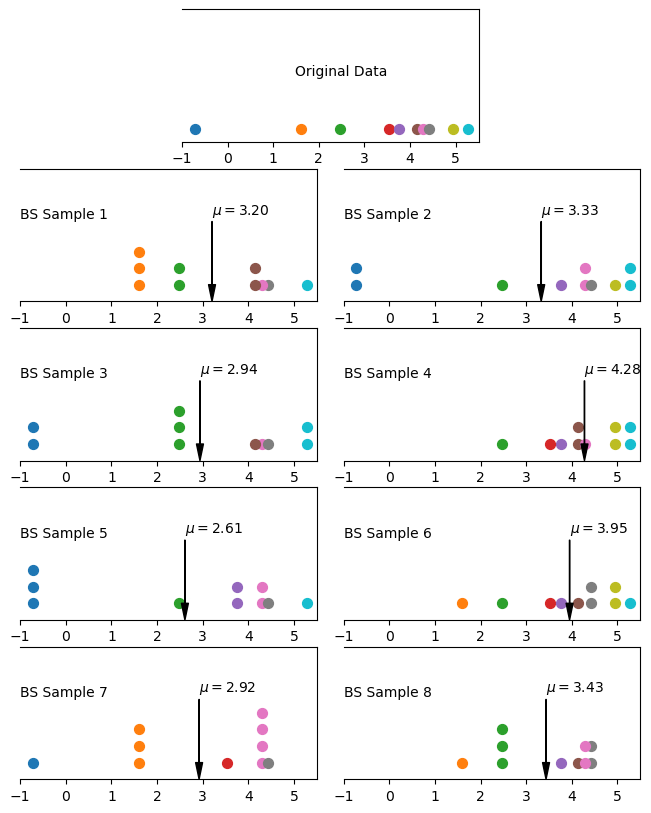

In [23]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(5, 4)
#gs.update(wspace=0.5)

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(8, 10)
np.random.seed(23341)
N=stats.norm(3,2)
nvals = N.rvs(10)
nvals.sort()
#plt.scatter(nvals, 0.01 *np.ones(10), s=50)
ax1 = plt.subplot(gs[0, 1:3])
for i, val in enumerate(nvals):
  ax1.scatter(val, 0.01 , s=50, c='C'+str(i))
ax1.set_ylim(0, 0.1)
ax1.set_xlim(-1, 5.5)
np.random.seed(1234512)



#ax = plt.gca()
ax1.spines['left'].set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.text(2.5, 0.05, 'Original Data',horizontalalignment='center',)

#ax1 = plt.subplot(gs[0, :2], )
#ax3 = plt.subplot(gs[1, 1:3])


for sample in range(1,9):
  #bs = npr.choice(nvals, len(nvals))
  bs = npr.choice(np.arange(0,len(nvals)), len(nvals))
  bsvals = nvals[bs]
  counts={}
  for val in bs: 
    counts[val]=0
  xstart = 2*((sample+1) %2)
  ax = plt.subplot(gs[(sample+1) // 2, xstart:xstart+2])


  for val in bs:
    counts[val]+=1
    ax.scatter(nvals[val], 0.005*counts[val], s=50, c = 'C'+str(val))
    
  height = 0.01*(max(counts.values())+1)
  avg = bsvals.mean()
  #ax.scatter(avg, 0.005, marker='x')
  #ax.arrow(avg, height-0.01, 0, -height+0.01+0.005, head_width = 0.15, head_length=0.005 )
  ax.annotate(f'$\mu=${avg:0.2f}', xy=(avg, 0),  xycoords = 'data',
              xytext = (avg, 0.03),
              arrowprops=dict(facecolor='black', width=0.2, headwidth=5),
              horizontalalignment='left', verticalalignment='top',
  )
  ax.text(-1, 0.025, 'BS Sample '+str(sample),horizontalalignment='left',)
  
  ax.set_ylim(0, 0.04)
  ax.set_xlim(-1, 5.5)

  ax.spines['left'].set_visible(False)
  ax.get_yaxis().set_visible(False)

## Terminology Review

Use the flashcards below to help you review the terminology introduced in this chapter. $~~~~ ~~~~ ~~~~$

In [24]:
from jupytercards import display_flashcards

#display_flashcards('flashcards/'+'parameter-distributions.json')

github='https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/'
github+='09-moments/flashcards/'
display_flashcards(github+'parameter-distributions.json')

<IPython.core.display.Javascript object>